In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# matplotlib configuration
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["axes.labelweight"] = "bold"

## Useful functions

In [3]:
def geoSeq(leftLimit, rightLimit, step):
    seq = []
    i = leftLimit
    while i <= rightLimit:
        seq.append(i)    
        i *= step
    return seq

def logPlot(xAxis, yAxis, legend=None):
    plt.xlim(np.array(xAxis).min() * 0.8, np.array(xAxis).max() * 1.2)
    plt.ylim(np.array(yAxis).min() * 0.8, np.array(yAxis).max() * 1.2)
    plt.xscale("log")
    plt.yscale("log")
    plt.scatter(xAxis, yAxis, s=100, color="red", marker="x", edgecolor="white")
    plt.plot(xAxis, yAxis, label=legend)
    if legend != None:
        plt.legend()
    
def customPlot(xAxis, yAxis, legend=None):
    plt.scatter(xAxis, yAxis, s=100, color="red", marker="x", edgecolor="white")
    plt.plot(xAxis, yAxis, label=legend)
    if legend != None:
        plt.legend()
    

## Plot Version 1 of the program, 2 Processes

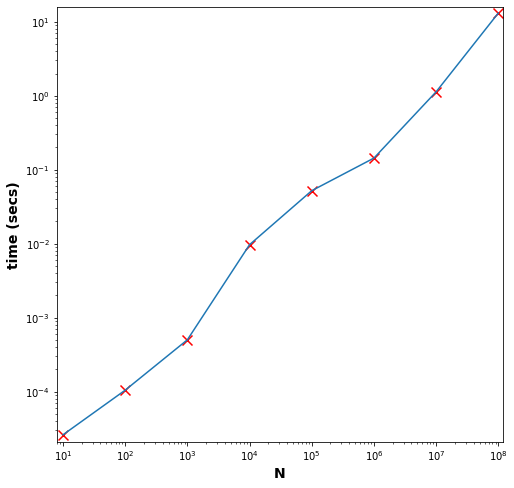

In [4]:
def plotVersion1(save=False, saveDir=""):
    # Read each result in testDir, get the mean from the runs.
    # Build a pandas series with the aggregated results.
    testDir = "tests/version1"
    leftLimit = 10
    rightLimit = 1e8
    step = 10
    numRuns = 10

    means = [] # This contains the final, aggregated results
    i = leftLimit
    while i <= rightLimit:
        times = [] # This contains temporary results
        for runIdx in range(1, numRuns + 1):
            with open(testDir + "/" + str(i) + "-run" + str(runIdx) + ".out") as file:
                times.append(float(str(file.read()).strip()))

        means.append(sum(times) / len(times))
        i *= step

    means = pd.Series(means)

    xAxis = geoSeq(leftLimit, rightLimit, step)

    plt.xlabel("N")
    plt.ylabel("time (secs)")
    logPlot(xAxis, means)
    
    if save == True and saveDir != "":
        plt.savefig(saveDir + "/" + "version1-list.png")
    
    return means

meansL2p = plotVersion1(save=True, saveDir="eval/images")

## Plot Version 2, 1 and 2 Processes

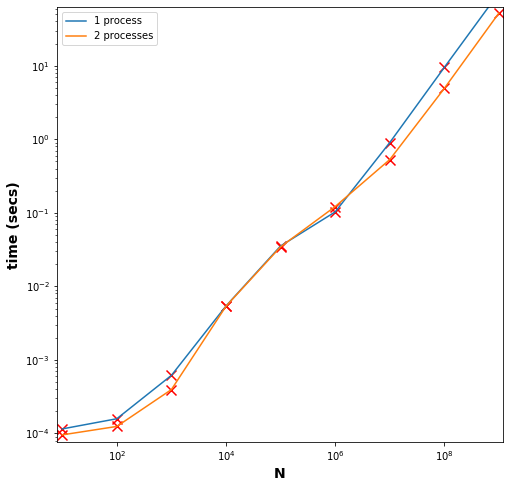

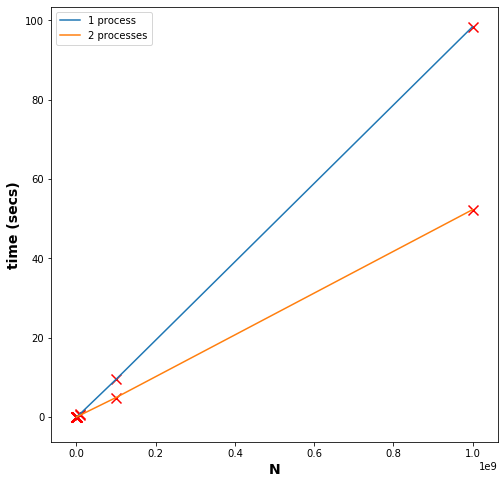

In [5]:
def getMeansVersion2(testDir, leftLimit, rightLimit, step, numRuns, numProcesses):
    # get means for 1 process
    means = [] # This contains the final, aggregated results
    i = leftLimit
    while i <= rightLimit:
        times = [] # This contains temporary results
        for runIdx in range(1, numRuns + 1):
            with open(testDir + "/" + str(i) + "-" + str(numProcesses) + "-run" + str(runIdx) + ".out") as file:
                times.append(float(str(file.read()).strip()))

        means.append(sum(times) / len(times))
        i *= step
    return pd.Series(means)

def plotVersion2(save=False, savedir=None):
    # Read each result in testDir, get the mean from the runs.
    # Build a pandas series with the aggregated results.
    testDir1p = "tests/1p-1000000000-version2"
    testDir2p = "tests/2p-1000000000-version2"
    leftLimit = 10
    rightLimit = 1e9
    step = 10
    numRuns = 10

    means1p = getMeansVersion2(testDir1p, leftLimit, rightLimit, step, numRuns, numProcesses=1)
    means2p = getMeansVersion2(testDir2p, leftLimit, rightLimit, step, numRuns, numProcesses=2)

    xAxis = geoSeq(leftLimit, rightLimit, step)


    # Plot everything
    plt.figure()
    plt.xlabel("N")
    plt.ylabel("time (secs)")
    logPlot(xAxis, means1p, legend="1 process")
    logPlot(xAxis, means2p, legend="2 processes")
    if save == True and savedir != None:
        plt.savefig(savedir + "/" + "version2-logplot.png")
    plt.figure()
    plt.xlabel("N")
    plt.ylabel("time (secs)")
    customPlot(xAxis, means1p, legend="1 process")
    customPlot(xAxis, means2p, legend="2 processes")
    if save == True and savedir != None:
        plt.savefig(savedir + "/" + "version2-linearplot.png")
        
    return means1p, means2p

meansV1p, meansV2p = plotVersion2(save=True, savedir="eval/images")

In [6]:
speedup = meansV1p / meansV2p
efficiency = speedup / 2

In [7]:
print("Speedup\n", speedup)
print("\nEfficiency\n", efficiency)

Speedup
 0    1.205021
1    1.272289
2    1.559382
3    1.008610
4    1.026932
5    0.845712
6    1.703335
7    1.929432
8    1.881699
dtype: float64

Efficiency
 0    0.602510
1    0.636145
2    0.779691
3    0.504305
4    0.513466
5    0.422856
6    0.851668
7    0.964716
8    0.940849
dtype: float64
